<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Walt9819/blob/developing/Week6/Activity6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Nombre de la entrega**: Actividad 1
### **Nombre del alumno**: Walter André Hauri Rosales
### **Matrícula del alumno**: A01794237
### **Profesor titular**: María de la Paz Rico Fernández
### **Profesor tutor**: Victoria Guerrero Orozco 
#### **Fecha**: 31 de octubre de 2022

Import all required libraries and functions

In [32]:
import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### Parte 1: Descarga los datos y carga el dataset en tu libreta.

La base de datos que se estará utuilizando es sobre la credibilidad de un cliente referente a diferentes características (edad, escolaridad, estado civil, sexo) y comportamientos (monto solicitado, historial de pagos anteriores, saldos y montos pagados) de personas en Taiwán.

El artículo original se puede encontrar en la siguiente referencia [Yeh, I. C., & Lien, C. H. (2009)](https://www.sciencedirect.com/science/article/abs/pii/S0957417407006719)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv", index_col=0)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


#### Parte 2: Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [3]:
df.shape

(30000, 24)

In [4]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [5]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [6]:
df.dtypes

X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  int64  
 1   X2      29999 non-null  float64
 2   X3      29998 non-null  float64
 3   X4      29998 non-null  float64
 4   X5      29995 non-null  float64
 5   X6      29997 non-null  float64
 6   X7      29995 non-null  float64
 7   X8      29993 non-null  float64
 8   X9      29991 non-null  float64
 9   X10     29984 non-null  float64
 10  X11     29986 non-null  float64
 11  X12     29989 non-null  float64
 12  X13     29989 non-null  float64
 13  X14     29987 non-null  float64
 14  X15     29985 non-null  float64
 15  X16     29983 non-null  float64
 16  X17     29990 non-null  float64
 17  X18     29992 non-null  float64
 18  X19     29991 non-null  float64
 19  X20     29992 non-null  float64
 20  X21     29989 non-null  float64
 21  X22     29989 non-null  float64
 22

In [8]:
df.isna().value_counts() # Check the most common missing information in columns

X1     X2     X3     X4     X5     X6     X7     X8     X9     X10    X11    X12    X13    X14    X15    X16    X17    X18    X19    X20    X21    X22    X23    Y    
False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False    29958
                                                               True   True   False  False  False  False  False  False  False  False  False  False  False  False  False        6
                            True   False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False        3
                            False  False  False  False  False  False  False  False  False  False  True   True   False  False  False  False  False  False  False  False        3
                                                        True   False  False  False  False  False  False  False  False  False  Fal

#### Parte 3: Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [9]:
# Check column X2
missing = df[df['X2'].isna()] # row with missing data
missing # Has none information, delete row

df_cleaned = df.copy() # dataframe where the cleaned data will be placed
df_cleaned = df_cleaned.drop(missing.index)

In [10]:
# Imputate mean to other variables
for i in range(3, 24):
  df_cleaned[f"X{i}"].fillna(df_cleaned[f"X{i}"].mean(), inplace=True)

In [23]:
y = df_cleaned["Y"] # Get Y variable
X = df_cleaned.drop(["Y"], axis=1) # remove Y variable from X

#### Parte 4: Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [24]:
X.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,2.999900e+04,29999.000000,29999.000000,29999.000000,29999.000000,2.999900e+04,29999.000000,29999.000000,29999.000000,29999.000000
mean,167485.572186,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,-0.266342,-0.291136,51236.862750,49190.734669,4.702535e+04,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.420884
std,129749.643651,0.489125,0.790306,0.521959,9.217410,1.123792,1.197174,1.195928,1.168997,1.133013,1.149884,73632.943233,71171.519446,6.934699e+04,64330.483370,60793.765743,59552.377504,16562.232361,2.304110e+04,17606.368053,15666.140124,15278.294880,17777.641144
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3566.500000,2986.500000,2.673500e+03,2332.000000,1769.000000,1258.000000,1000.000000,8.360000e+02,390.000000,298.000000,254.500000,118.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22399.000000,21226.000000,2.010700e+04,19065.000000,18123.000000,17099.000000,2100.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67092.000000,64008.500000,6.016550e+04,54509.000000,50178.000000,49200.500000,5007.000000,5.000000e+03,4512.000000,4016.000000,4041.500000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


En este caso en particular podemos ver que las diferentes columnas tienen diferentes comportamientos. En particular que el rango de la primera es positivo, con un valor mínimo de 10,000 y máximo de 10,00,000 con un promedio de alrededor de 167,485 y una mediana de 140,000 lo que, al ser bastante similares hace pensar que la distribución es bastante simétrica y hay pocos outliers.
En el caso de X2, X3 y X4 son variables categóricas, mientras que X5 es la edad. El resto tienen valores de entre -2 y 8, valores que se pueden ver en la tabla con los valores mínimos y máximos. 

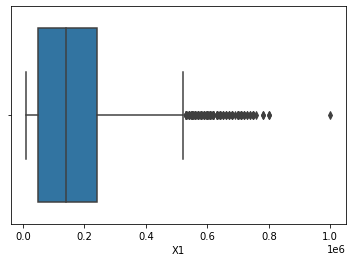

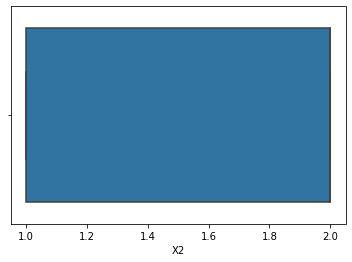

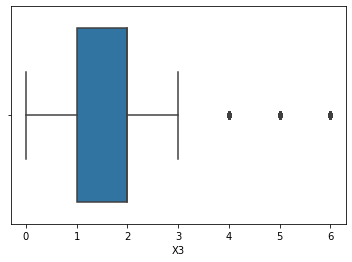

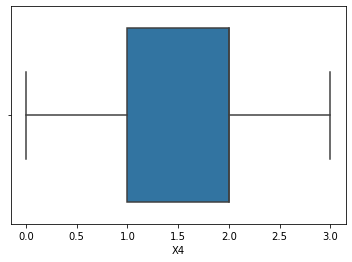

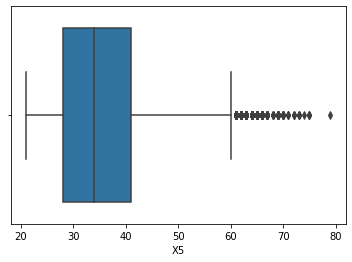

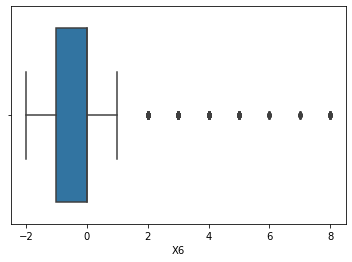

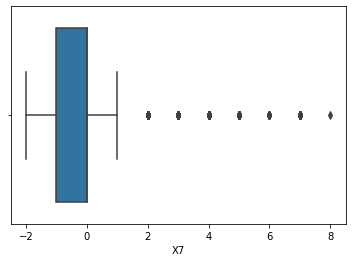

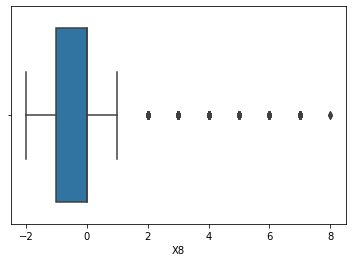

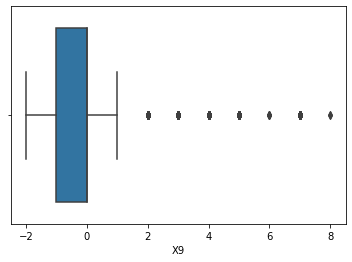

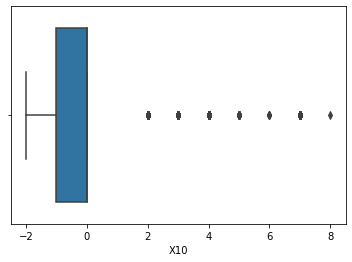

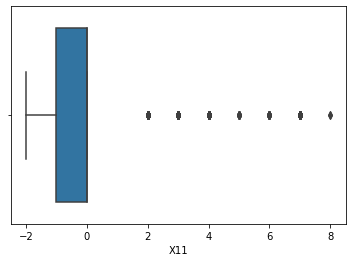

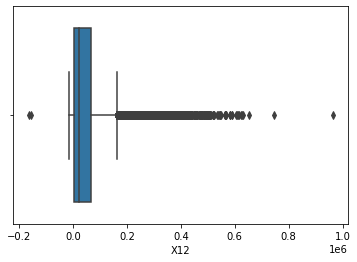

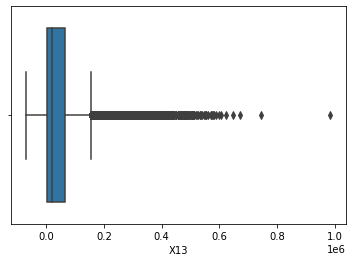

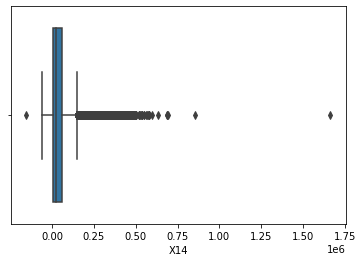

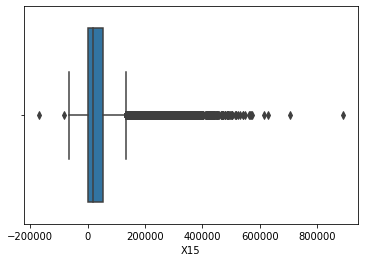

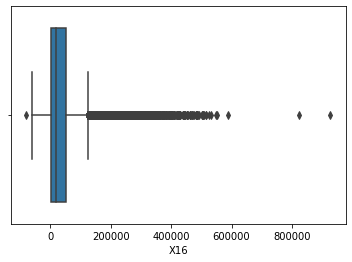

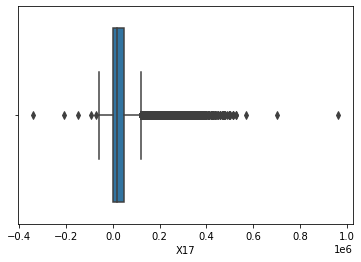

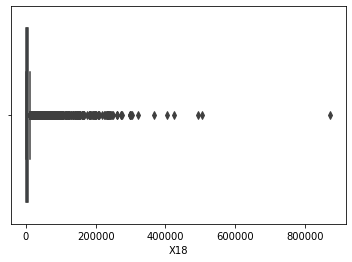

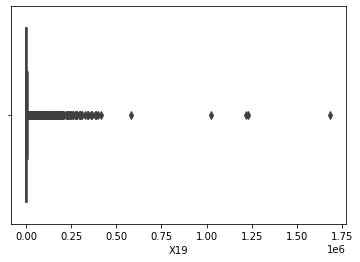

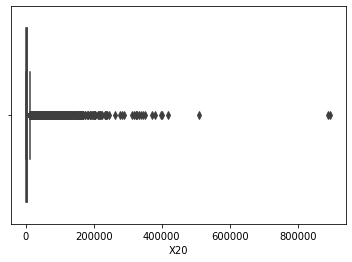

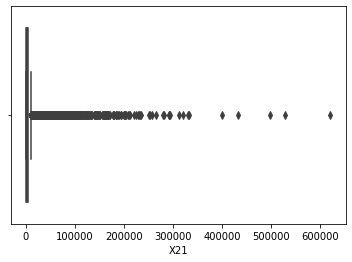

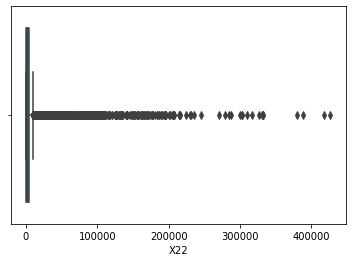

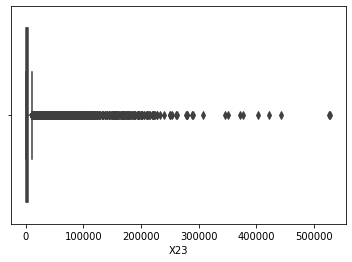

In [25]:
for col, values in X.items():
    sns.boxplot(x=values); plt.show();

#### Parte 5: Realiza el conteo de las variables categóricas

In [28]:
categorical = ["X2", "X3", "X4"]
categorical.extend([f"X{i}" for i in range(6, 12)])

categorical ## Display categorical column names

['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']

In [30]:
df_categorical = X[categorical]

for col, values in df_categorical.items():
    print(values.value_counts())

2.0    18112
1.0    11887
Name: X2, dtype: int64
2.000000    14030
1.000000    10585
3.000000     4915
5.000000      280
4.000000      123
6.000000       51
0.000000       14
1.853057        1
Name: X3, dtype: int64
2.000000    15964
1.000000    13657
3.000000      323
0.000000       54
1.551903        1
Name: X4, dtype: int64
 0.000000    14736
-1.000000     5684
 1.000000     3688
-2.000000     2759
 2.000000     2667
 3.000000      322
 4.000000       76
 5.000000       26
 8.000000       19
 6.000000       11
 7.000000        9
-0.016635        2
Name: X6, dtype: int64
 0.000000    15728
-1.000000     6047
 2.000000     3927
-2.000000     3782
 3.000000      326
 4.000000       99
 1.000000       28
 5.000000       25
 7.000000       20
 6.000000       12
-0.133689        4
 8.000000        1
Name: X7, dtype: int64
 0.000000    15761
-1.000000     5935
-2.000000     4085
 2.000000     3819
 3.000000      240
 4.000000       76
 7.000000       27
 6.000000       23
 5.000000       2

#### Parte 6: Escala los datos, si consideras necesario

In [33]:
df_numerical = X.drop(categorical, axis=1)

In [37]:
scaler = StandardScaler()
scaler.fit(df_numerical)
X_scaled = scaler.transform(df_numerical)

#### Parte 7: The PCA model

##### Parte 7.1: Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

In [64]:
pca = PCA(n_components=df_numerical.shape[1]) # estimate only 2 PCs
X_scaled = pca.fit_transform(X_scaled) # project the original data into the PCA space

Variance explained: [0.42278606 0.12258271 0.07465077 0.06606558 0.06311666 0.06233373
 0.05568147 0.05189934 0.05051586 0.01888843 0.00507342 0.00293412
 0.00181168 0.00166018]


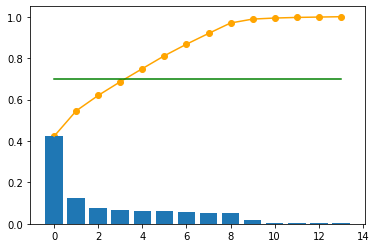

In [65]:
import numpy as np

variance_explained = pca.explained_variance_ratio_
print(f"Variance explained: {variance_explained}")

plt.bar(x=[i for i in range(len(variance_explained))], height=variance_explained)
plt.scatter(x=[i for i in range(len(variance_explained))], y = np.cumsum(variance_explained), color="orange")
plt.plot([i for i in range(len(variance_explained))], np.cumsum(variance_explained), color="orange")
plt.plot([i for i in range(len(variance_explained))], [0.7 for i in range(len(variance_explained))], color="green")

Dada la gráfica obtenida, es posible obtener más del 70% de la varianza explicada usando únicamente las primeras 4 componentes principales, reduciendo de 14 a 4.

In [71]:
df_reduced = pd.DataFrame(X_scaled[:, :4])
df_reduced

,0,1,2,3
0,-1.959007,-0.536613,1.329946,-0.175815
1,-1.735831,-0.217025,0.863608,-0.280515
2,-1.224720,-0.284750,0.213033,-0.008092
3,-0.541368,-0.666530,0.097486,0.292321
4,-0.849170,0.738662,-1.392648,1.659222
...,...,...,...,...
29994,2.576590,-0.689396,-0.305671,0.517238
29995,-1.544493,0.187184,-0.724924,0.546754
29996,-1.285322,0.146811,0.250613,0.430326
29997,0.831379,2.421734,0.364404,0.216662


##### Parte 7.2: Indica la importancia de las variables en cada componente

In [79]:
print(abs( pca.components_[:4, :] )) # Display the features importance for each principal component

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 6.88338275e-15 2.19269047e-15
  1.09634524e-15 4.71844785e-16 1.04083409e-15 5.44703171e-16
  5.88418203e-15 1.87350135e-16 6.96057795e-17 1.42572586e-17
  1.26987179e-17 2.73218947e-17]
 [0.00000000e+00 7.21644966e-15 1.00000000e+00 1.01169073e-14
  1.44155521e-15 3.14678839e-15 2.06085149e-15 6.99093561e-16
  1.33226763e-14 3.46944695e-18 2.08166817e-17 2.36085023e-17
  1.05641949e-17 2.26598254e-17]
 [0.00000000e+00 2.38697950e-15 1.01446629e-14 1.00000000e+00
  5.19246104e-15 7.66747776e-15 3.92741395e-15 9.15500314e-16
  1.39194212e-14 1.25333771e-16 7.44982418e-17 2.47740196e-17
  7.40815016e-18 9.44340092e-17]]


Como se puede observar, prácticamente cada una de las componentes tomó como referencia una de las primeras variables del dataset original y fue al que meyor impotrancia le dio. Es decir, es posible que las demás variables no aporten gran información a la varianza total.

#### Parte 8: Elabora los histogramas de los atributos para visualizar su distribución

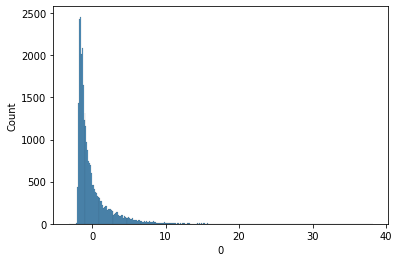

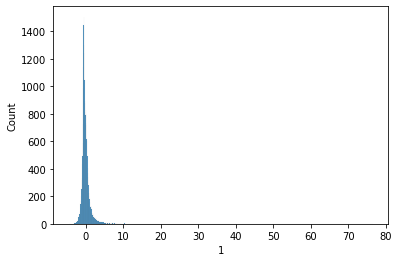

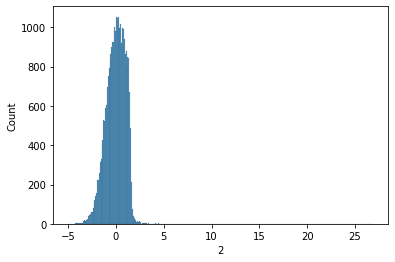

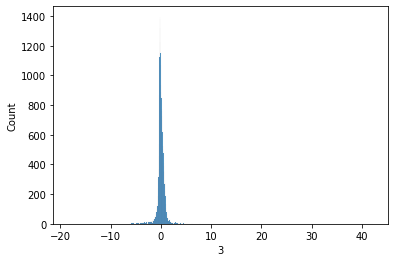

In [84]:
for col, values in df_reduced.items():
    sns.histplot(values); plt.show();

#### Parte 9: Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc. 
#### Parte 10: Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

In [133]:
df_rename = df_cleaned.rename(columns={"X1": "Amount of credit", "X2": "Gender", "X3": "Education", "X4": "Marital status", "X5": "Age", "Y": "Credible client"})
df_rename["Credible client"] = df_rename["Credible client"].map({0: "N", 1: "Y"})
df_rename["Gender"] = df_rename["Gender"].map({1: "M", 2: "F"})

Visualizamos la distribución de edades clasificados según si les dieron el crédito o no.

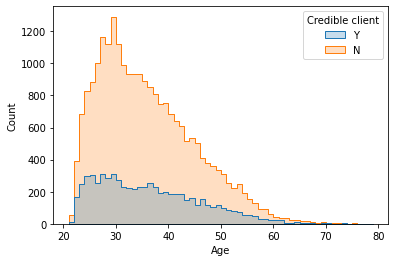

In [134]:
ax = sns.histplot(data=df_rename, x="Age", hue="Credible client", element="step", binwidth=1);

En este caso podemos observar la distribución de otorgamiento de créditos según la edad de los solicitantes. En particular se puede apreciar que la mayoría de las personas que solicitan un crédito se encuentran entre los 25 y 35 años de edad. De estos, en general se tiende a otorgarles la mayor parte de los créditos a los adultos jóvenes, los cuales desde los 25 y hasta los 40 años de edad parecen tener una credibilidad similar, la cual decae abruptamente (al igual que el número de créditos solicitados) a partir de los 40.


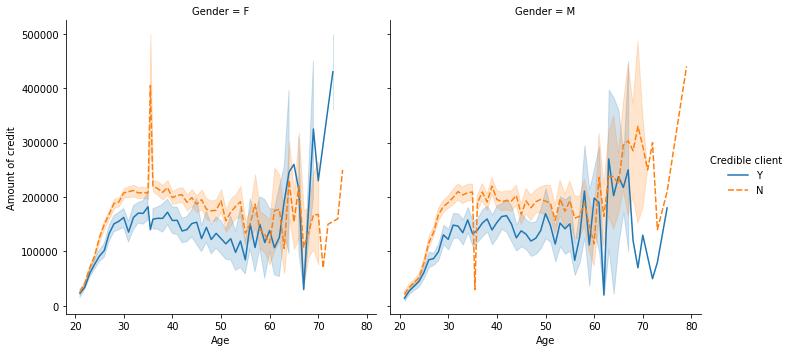

In [135]:
ax = sns.relplot(
    data=df_rename, x="Age", y="Amount of credit",
    col="Gender", hue="Credible client", style="Credible client",
    kind="line"
)

Esta figura nos muestra la distribución de los montos de crédito otorgados según la edad y el sexo de la persona. En concreto se puede apreciar que los montos más altos son solicitados mayormente por personas adultas mayores, de las cuales a las mujeres se les identifican como creíbles incluso con montos muy altos de crédito, mientras que para los hombres en la misma situación generalmente se identifican como no creibles.

Por otro lado se puede notar que a partir de entre los 25 y 35 años de edad hay un incremento en el monto solicitado (para ambos sexos), de los cuales generalmente los clientes creíbles piden un monto menor que los de los no creíbles. Posteriormente llega una caída en el monto solicitado a partir de los 40 años (posiblemente un momento en la vida de las personas en la cual se tiene mayor estabilización económica), corroborado con el histograma de la figura anterior, donde dejan de solicitar créditos. Hasta llegada la edad de 60 años, donde los pocos que solicitan lo hacen de montos más altos.

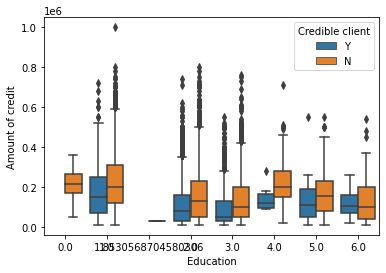

In [136]:
ax = sns.boxplot(data=df_rename, x="Education", y="Amount of credit", hue="Credible client");

Con esta distribución es posible observar que los montos solicitados son dependientes del nivel de estudios de las personas, en particularva decreciendo conforme mayor educación. Sin embargo, las personas identificadas como creíbles les son otorgados montos mucho menores a los que solicitan la mayoría de las veces, a ecepción de los de nivel 6. En este caso podría ser un indicador de que a mayor educación, menor necesida de crédito, y que aquellos que lo solicitan son altamente creíbles.

**NOTA**: En todos los gráficos se pueden notar valores extraños (picos muy altos o categorías no enteras), estos son debidos a la imputación de la media (quizás la mediana pudiera haber sido mejor opción, o la moda en su defecto).